# Experimento en los ordenadores cuánticos de IBM


## El circuito


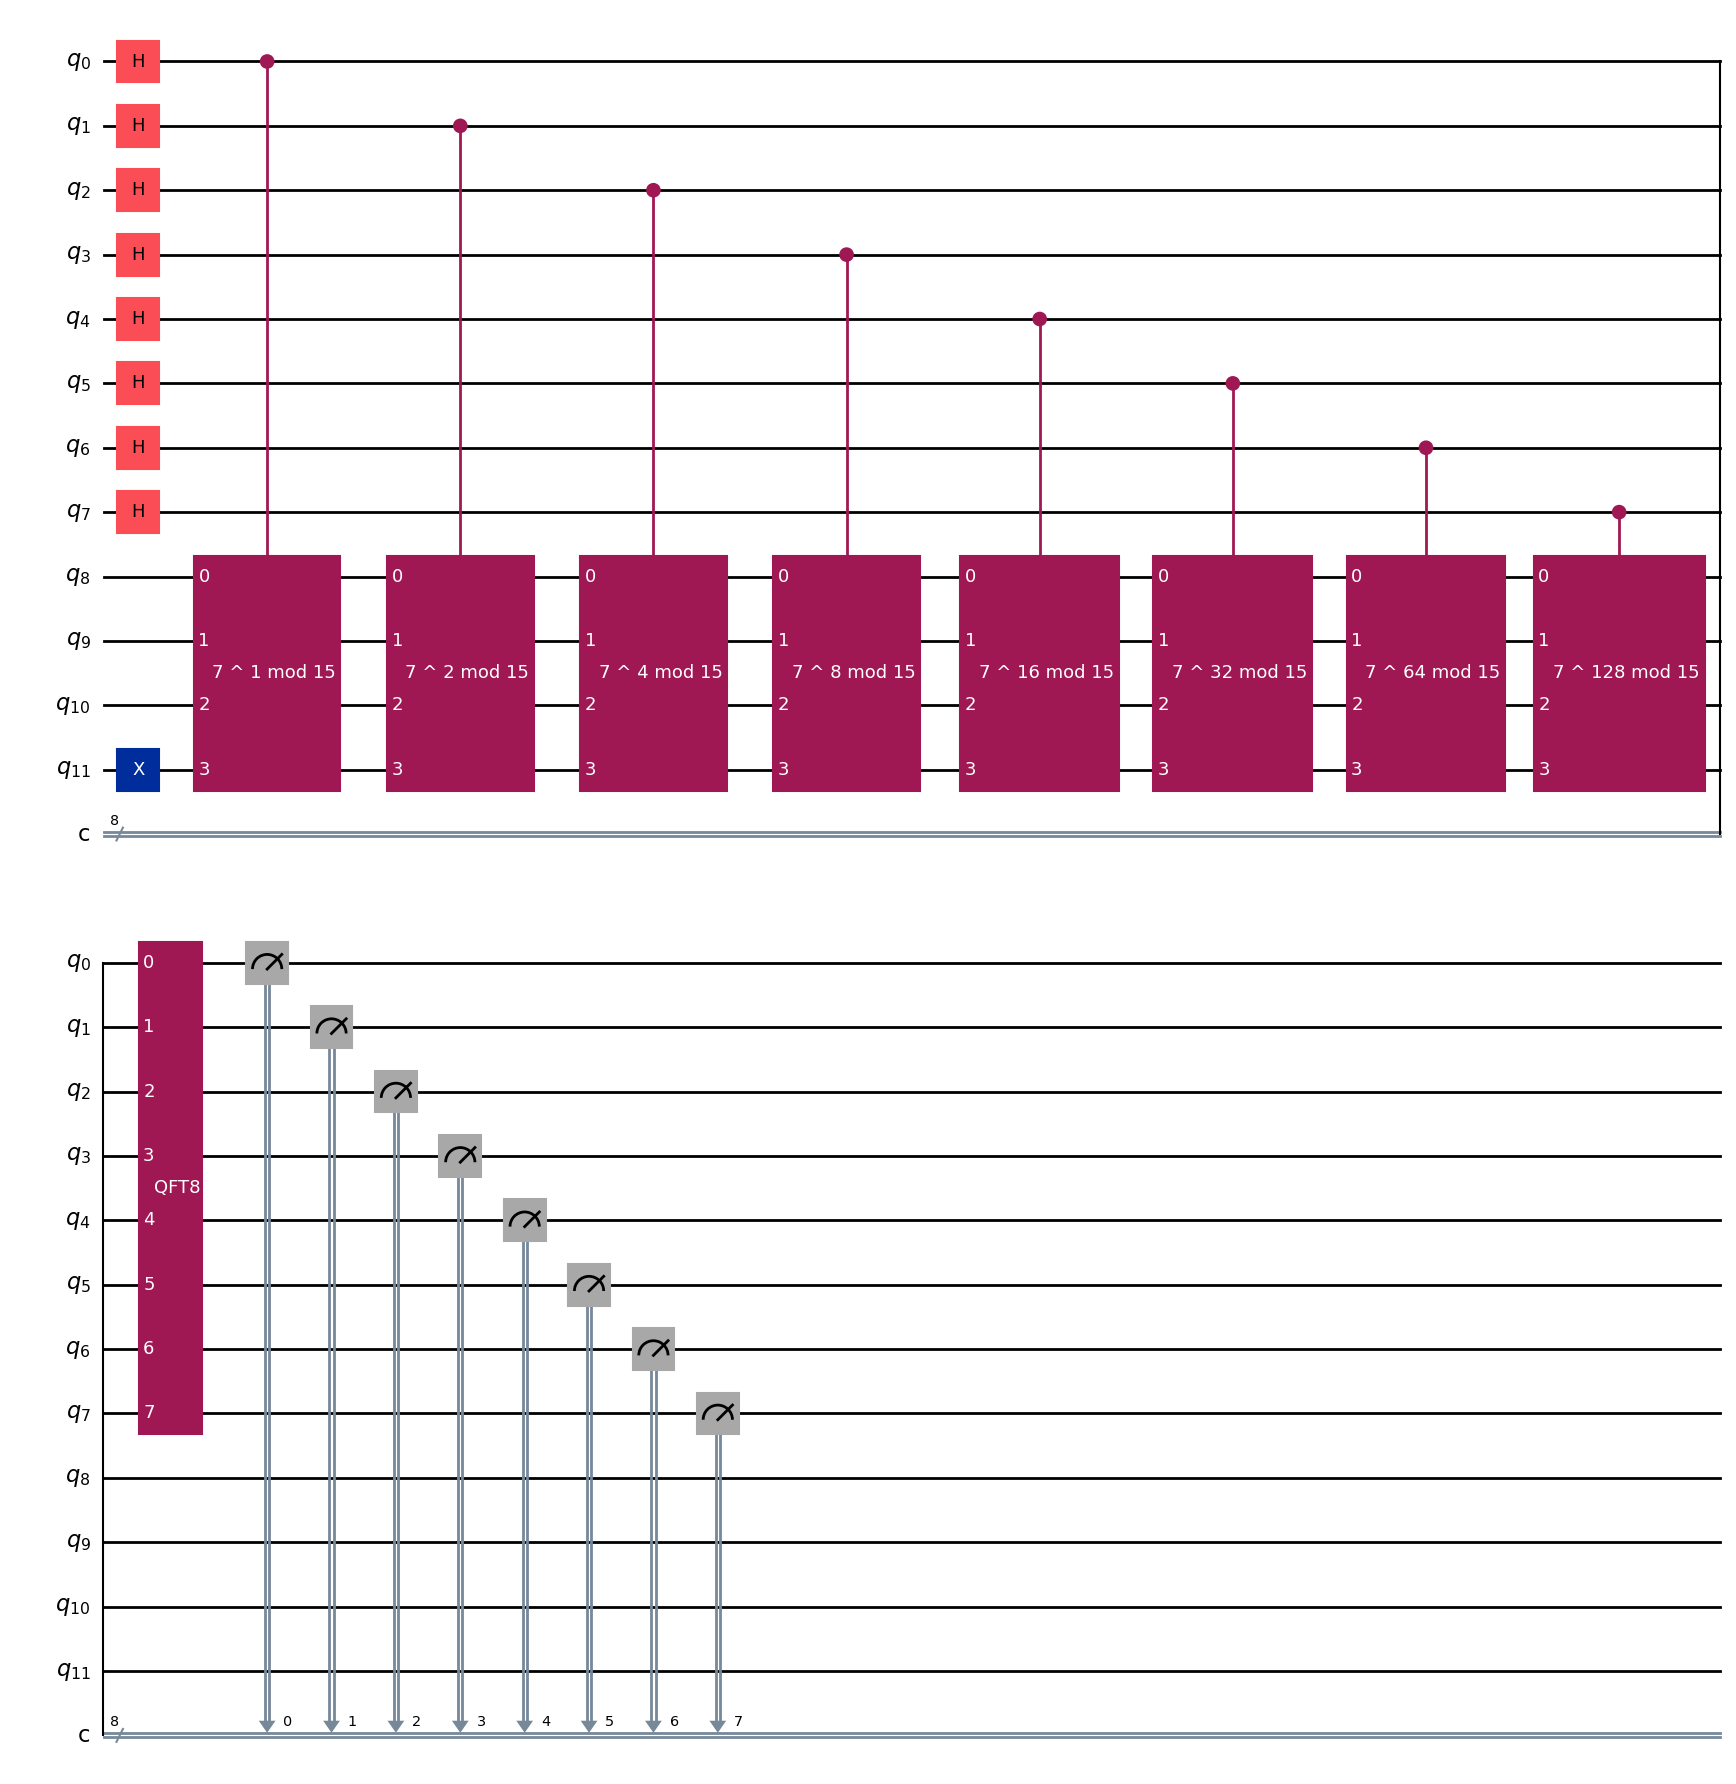

In [1]:
from qiskit import QuantumCircuit
from function_helper import QFT, c_amod15

n_count = 8
a = 7
qc = QuantumCircuit(n_count + 4, n_count)
for q in range(n_count):
    qc.h(q)

qc.x(3 + n_count)

# Se añade la puerta c_amod15
for q in range(n_count):
    qc.append(c_amod15(a, 2**q), [q] + [i + n_count for i in range(4)])

# Se añade la QFT
qc.append(QFT(n_count), range(n_count))
qc.measure(range(n_count), range(n_count))
qc.draw("mpl")

## Optimización del circuito


In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")
print("Ya está el backend")

pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
qc_transpiled = pm.run(qc)

## Ejecución en el hardware


In [ ]:
# from qiskit_ibm_runtime import SamplerV2 as Sampler

# sampler = Sampler(mode=backend)

# job = sampler.run([qc_transpiled])
# print(job.job_id())

## Los resultados


In [ ]:
job_id = "d2jk2fghsgmc73b3a6e0"
job = service.job(job_id)

In [ ]:
data = job.result()[0].data
values = data.c.get_counts()
count_list = list(values.values())
binary_list = list(values.keys())
values_decimal_list = [
    int(binary_list[i], base=2) for i in range(0, len(binary_list))
]


x: list[int] = values_decimal_list
y: list[int] = count_list
# Es necesario ordenar los números ya que sino el plt no funciona bien
data_decimal: dict[int, int] = dict(zip(x, y))
sort_decimal_data: dict[int, int] = dict(sorted(data_decimal.items()))
print(sort_decimal_data)
x = list(sort_decimal_data.keys())
y = list(sort_decimal_data.values())

# Ahora los números más frecuentes
sort_count_data: dict[int, int] = dict(
    sorted(data_decimal.items(), key=lambda x: x[1], reverse=True)
)

{0: 29, 1: 16, 2: 19, 3: 14, 4: 17, 5: 11, 6: 14, 7: 17, 8: 17, 9: 15, 10: 15, 11: 8, 12: 21, 13: 5, 14: 21, 15: 9, 16: 25, 17: 11, 18: 16, 19: 15, 20: 18, 21: 21, 22: 14, 23: 13, 24: 15, 25: 11, 26: 10, 27: 10, 28: 23, 29: 7, 30: 26, 31: 17, 32: 16, 33: 14, 34: 17, 35: 19, 36: 25, 37: 22, 38: 18, 39: 13, 40: 17, 41: 11, 42: 12, 43: 14, 44: 30, 45: 14, 46: 13, 47: 5, 48: 34, 49: 19, 50: 20, 51: 17, 52: 15, 53: 21, 54: 15, 55: 21, 56: 12, 57: 6, 58: 7, 59: 7, 60: 15, 61: 10, 62: 21, 63: 12, 64: 29, 65: 21, 66: 26, 67: 15, 68: 31, 69: 24, 70: 14, 71: 14, 72: 22, 73: 10, 74: 15, 75: 12, 76: 21, 77: 11, 78: 21, 79: 13, 80: 21, 81: 18, 82: 19, 83: 14, 84: 17, 85: 18, 86: 16, 87: 17, 88: 22, 89: 12, 90: 11, 91: 13, 92: 22, 93: 14, 94: 25, 95: 17, 96: 19, 97: 15, 98: 17, 99: 17, 100: 13, 101: 17, 102: 20, 103: 13, 104: 25, 105: 6, 106: 14, 107: 7, 108: 20, 109: 12, 110: 26, 111: 9, 112: 32, 113: 16, 114: 25, 115: 13, 116: 17, 117: 16, 118: 10, 119: 14, 120: 18, 121: 14, 122: 22, 123: 5, 124: 

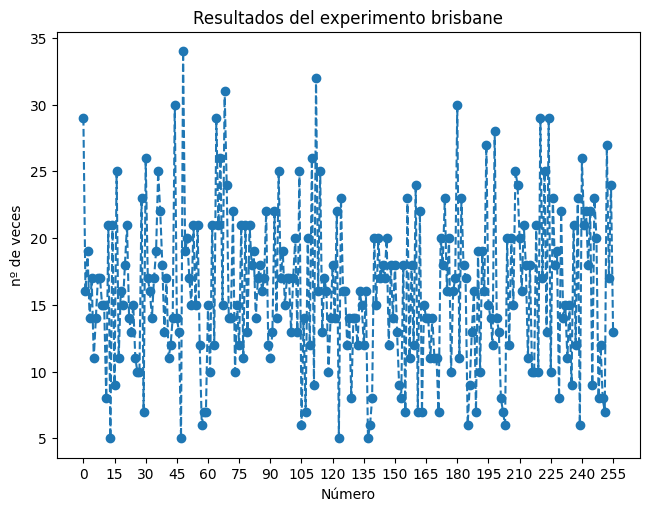

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x, y, "--o")
plt.tight_layout()
plt.title("Resultados del experimento Brisbane")
plt.xlabel("Número")
plt.xticks(range(0, len(x), 15))
plt.ylabel("nº de veces")

plt.savefig("Resultados_de_experimento_Brisbane.png", dpi=300)
plt.show()

## Ahora la extracción y exportación de datos a Excel


In [ ]:
import pandas as pd

df = pd.DataFrame({"Número": x, "Frecuencia": y})

In [ ]:
with pd.ExcelWriter("QPU IBM Brisbane.xlsx") as writer:
    df.to_excel(writer, sheet_name="QPU_IBM brisbane", index=False)